## Sleep Health

### Import data file

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep = ',')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### Changing target category to more convenient way

In [2]:
df['Sleep Disorder'].replace(np.nan, 'None', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### Stat of all numeric columns

In [3]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Data Analysis
### Heatmap correlation of numeric columns

<Axes: >

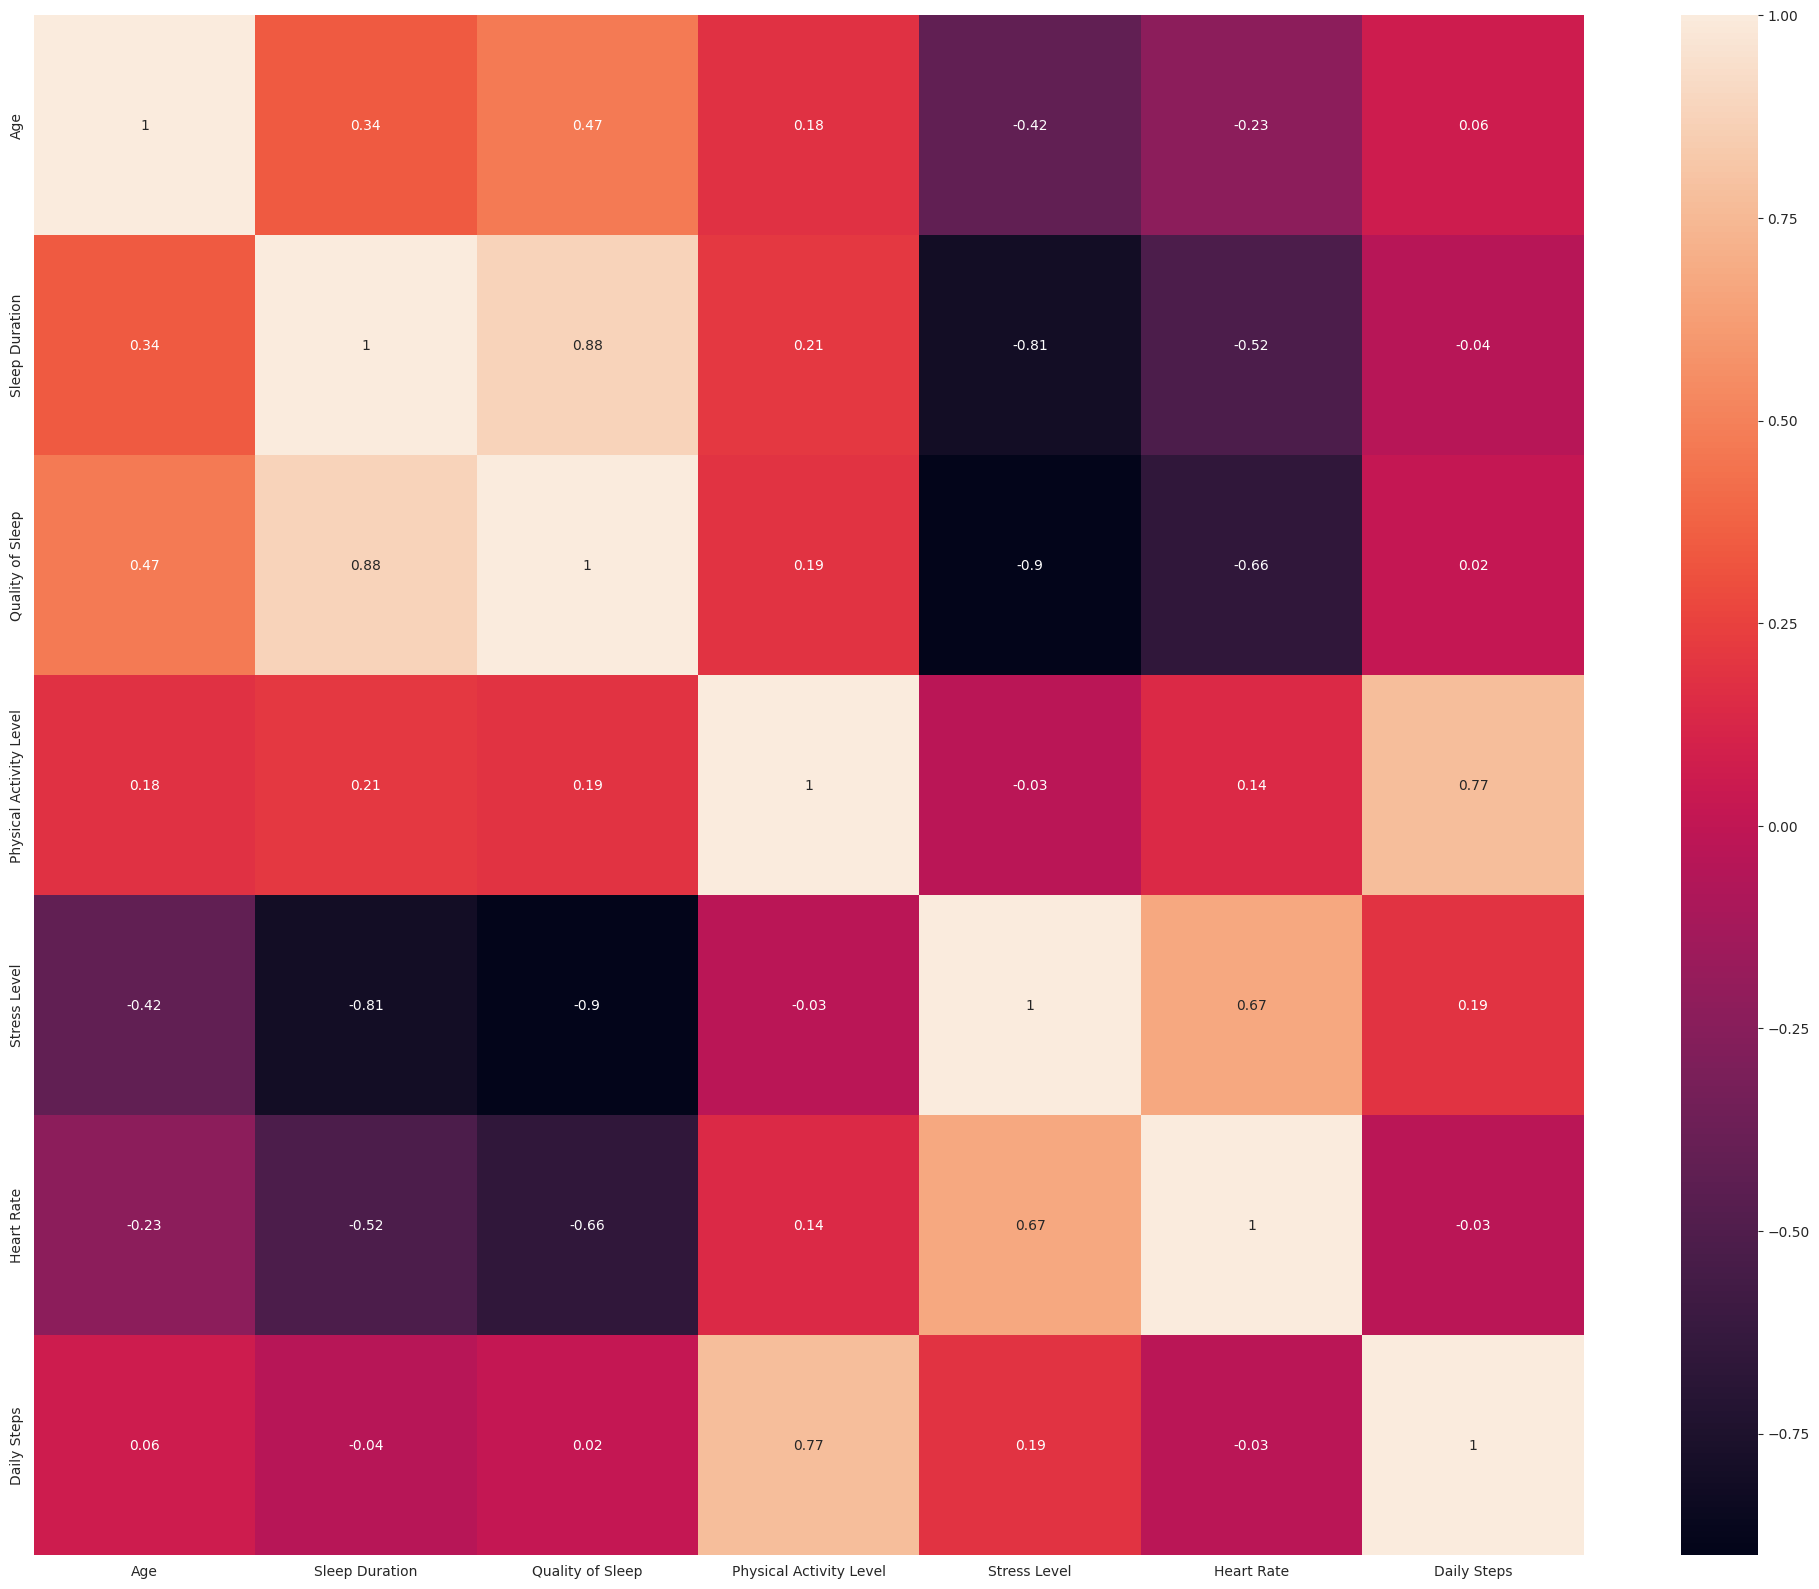

In [4]:
corr = df.drop('Person ID', axis=1).select_dtypes(include=np.number).corr().round(2)
plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True)

### We can see above, that some features have a strength correlation among themselves. So in the feature we will choose of two high correlated features.

### Count histogram plot of each categorical feature

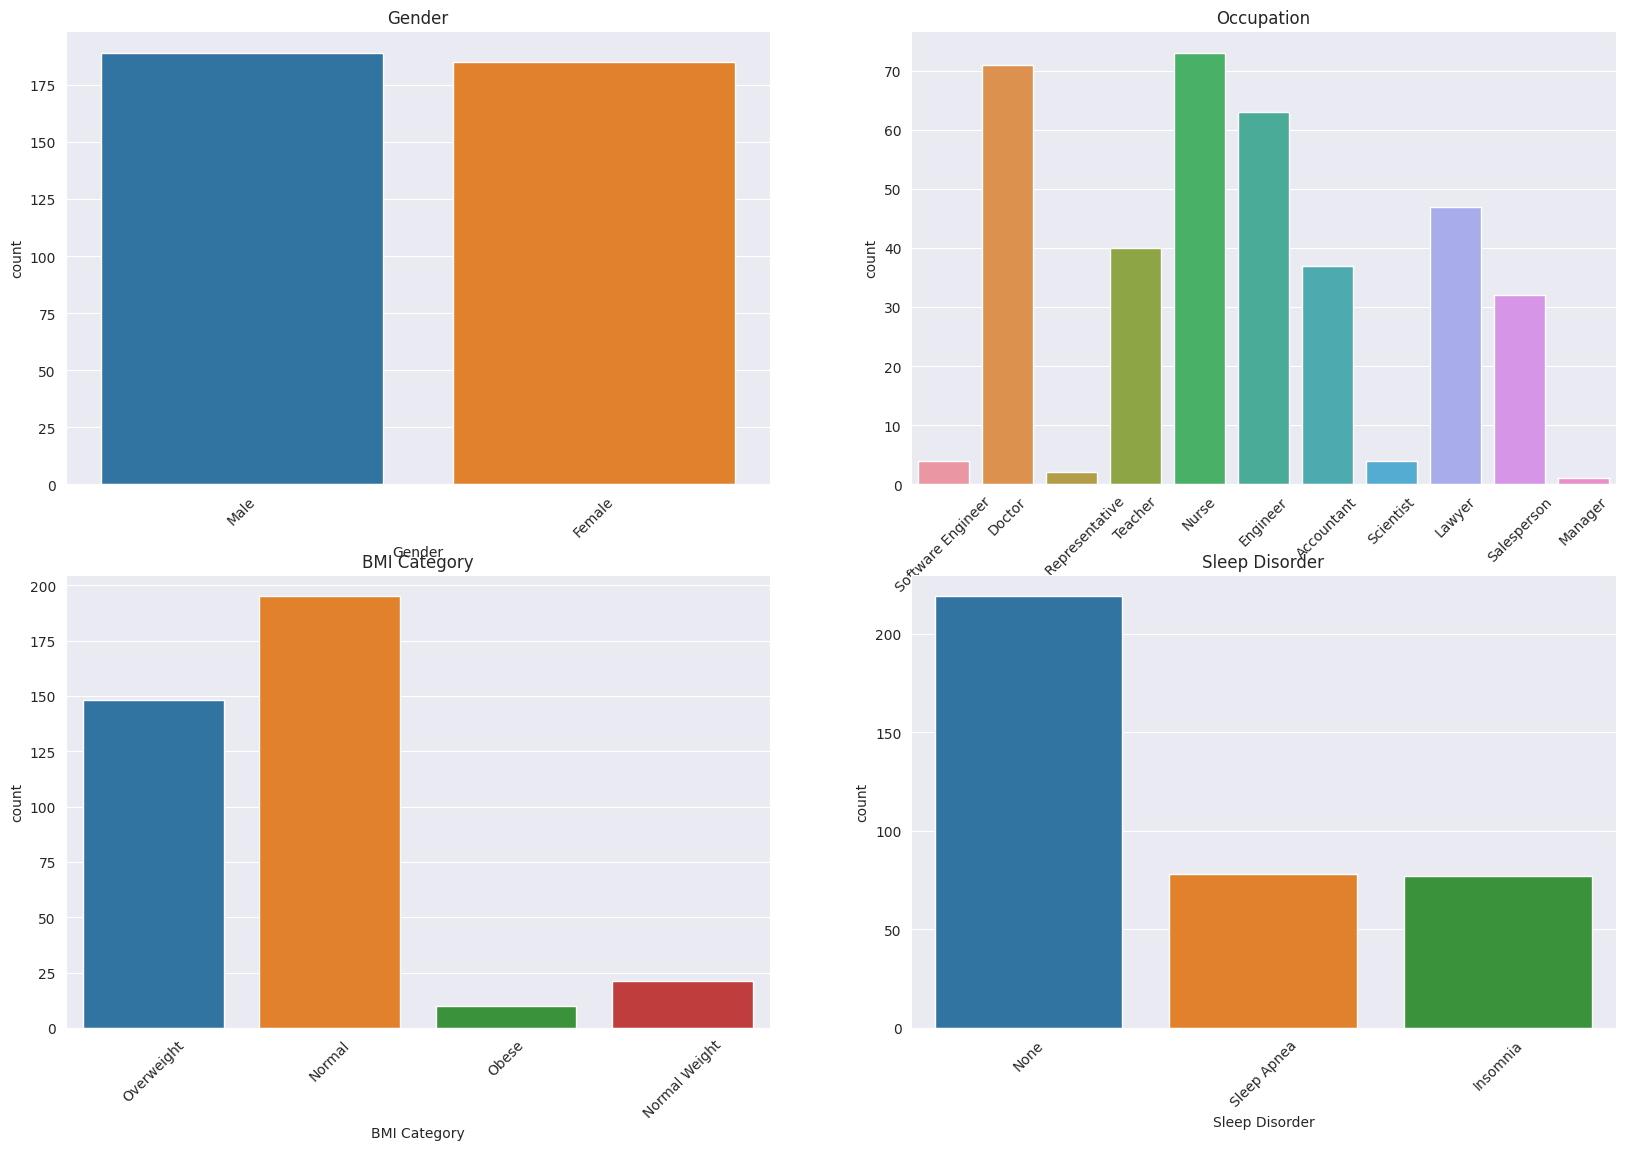

In [5]:
plt.figure(figsize=(20, 20))

object_cols = df.select_dtypes(include=['object']).columns
object_cols = object_cols.drop('Blood Pressure')
for i, col in enumerate(object_cols):
    plt.subplot(3, 2, i+1)
    plt.gca().set_title(col)
    plt.xticks(rotation = 45)
    sns.countplot(x=col, data=df)


### Count plot of each numeric feature

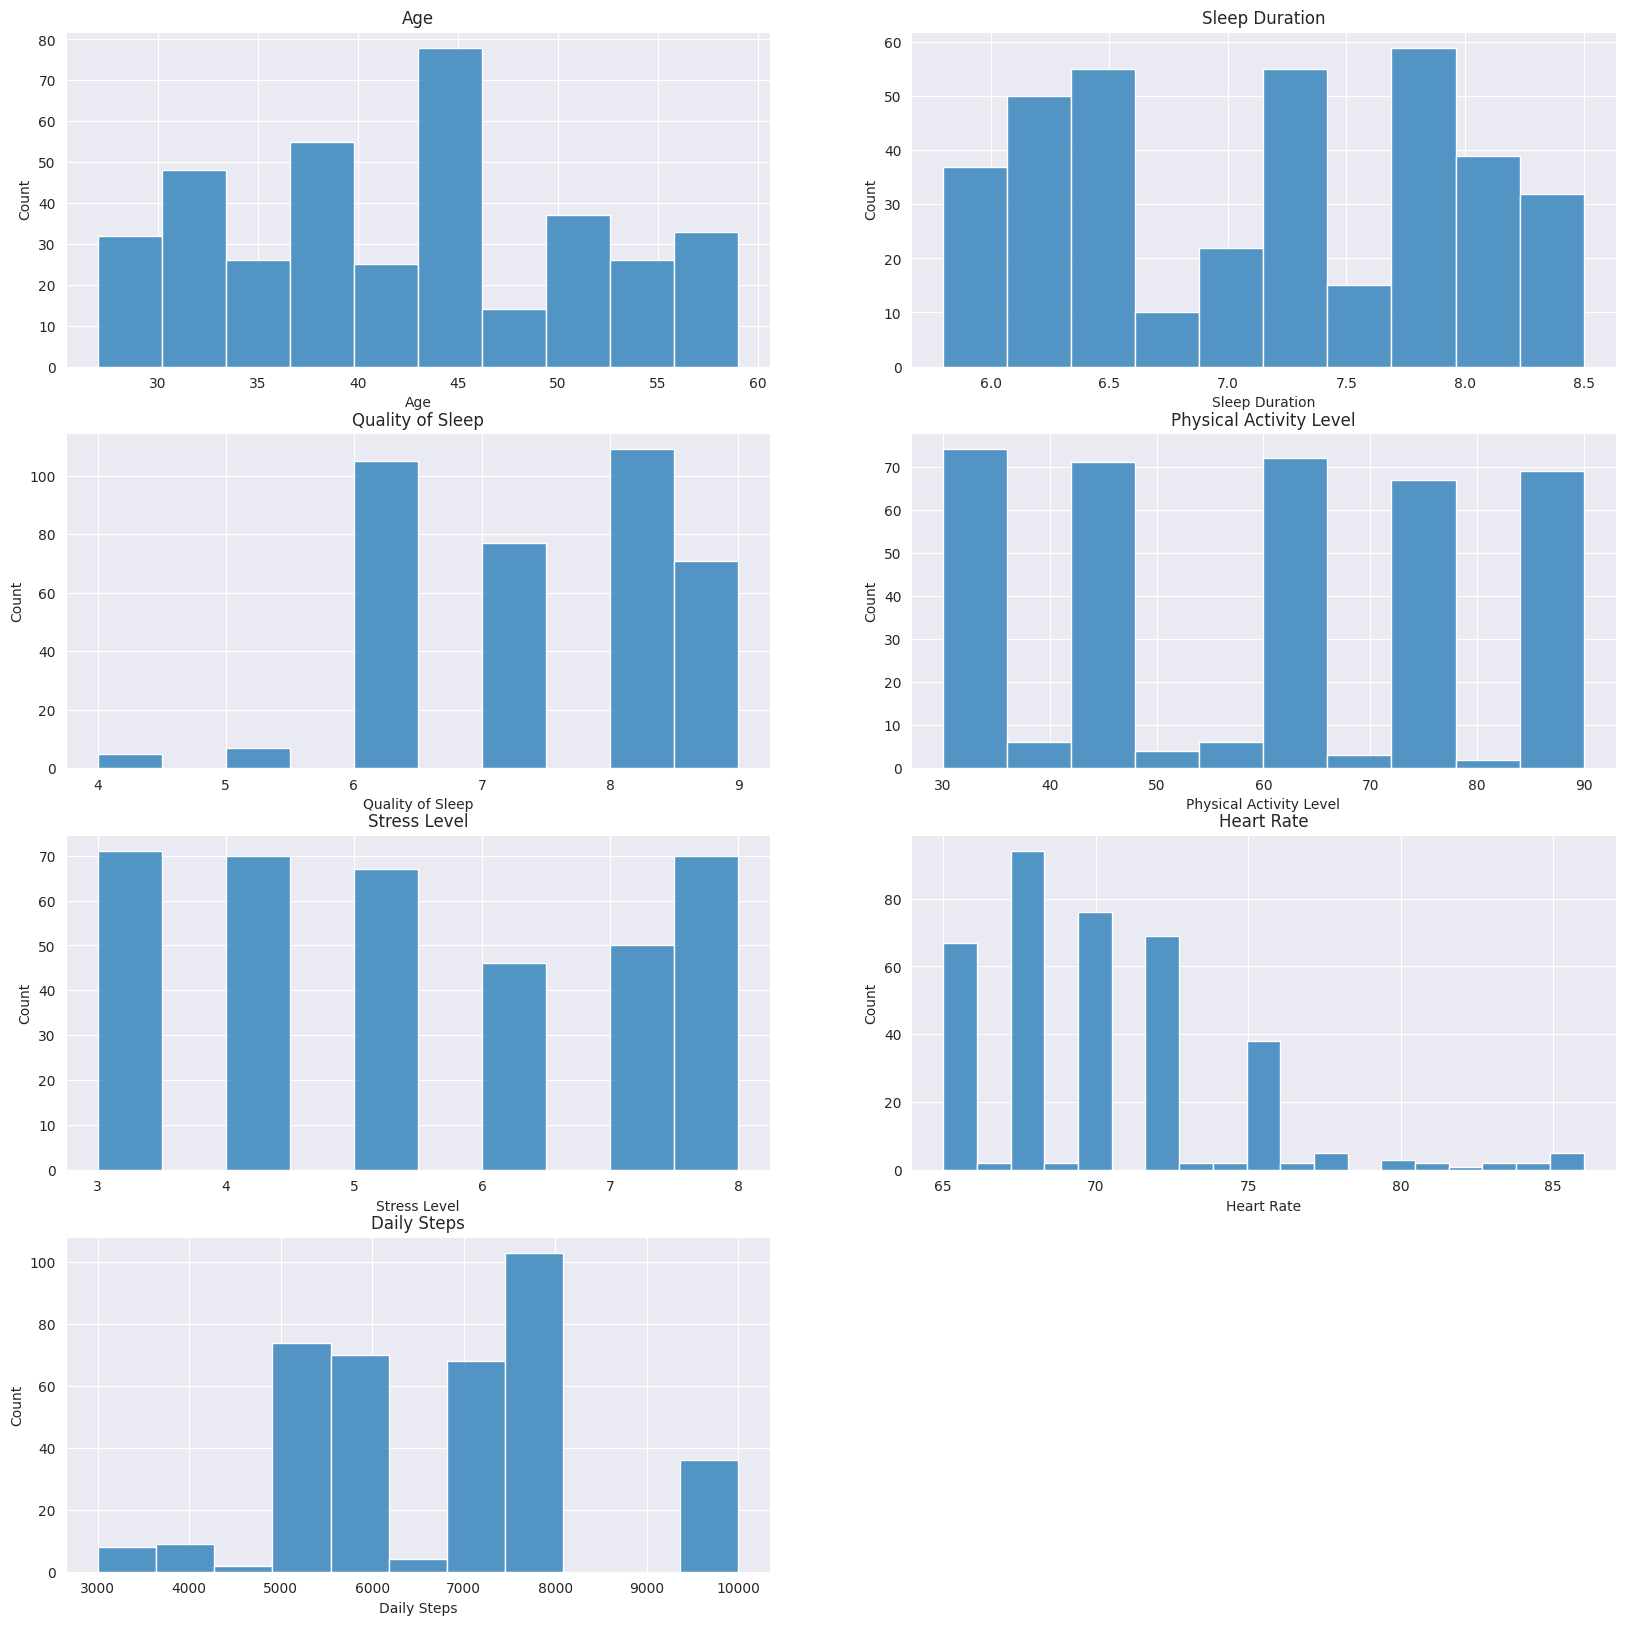

In [6]:
plt.figure(figsize=(20, 20))

numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop(['Person ID'])
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 2, i+1)
    plt.gca().set_title(col)
    sns.histplot(x=col, data=df)


### Count plot of each categorical feature via target classes

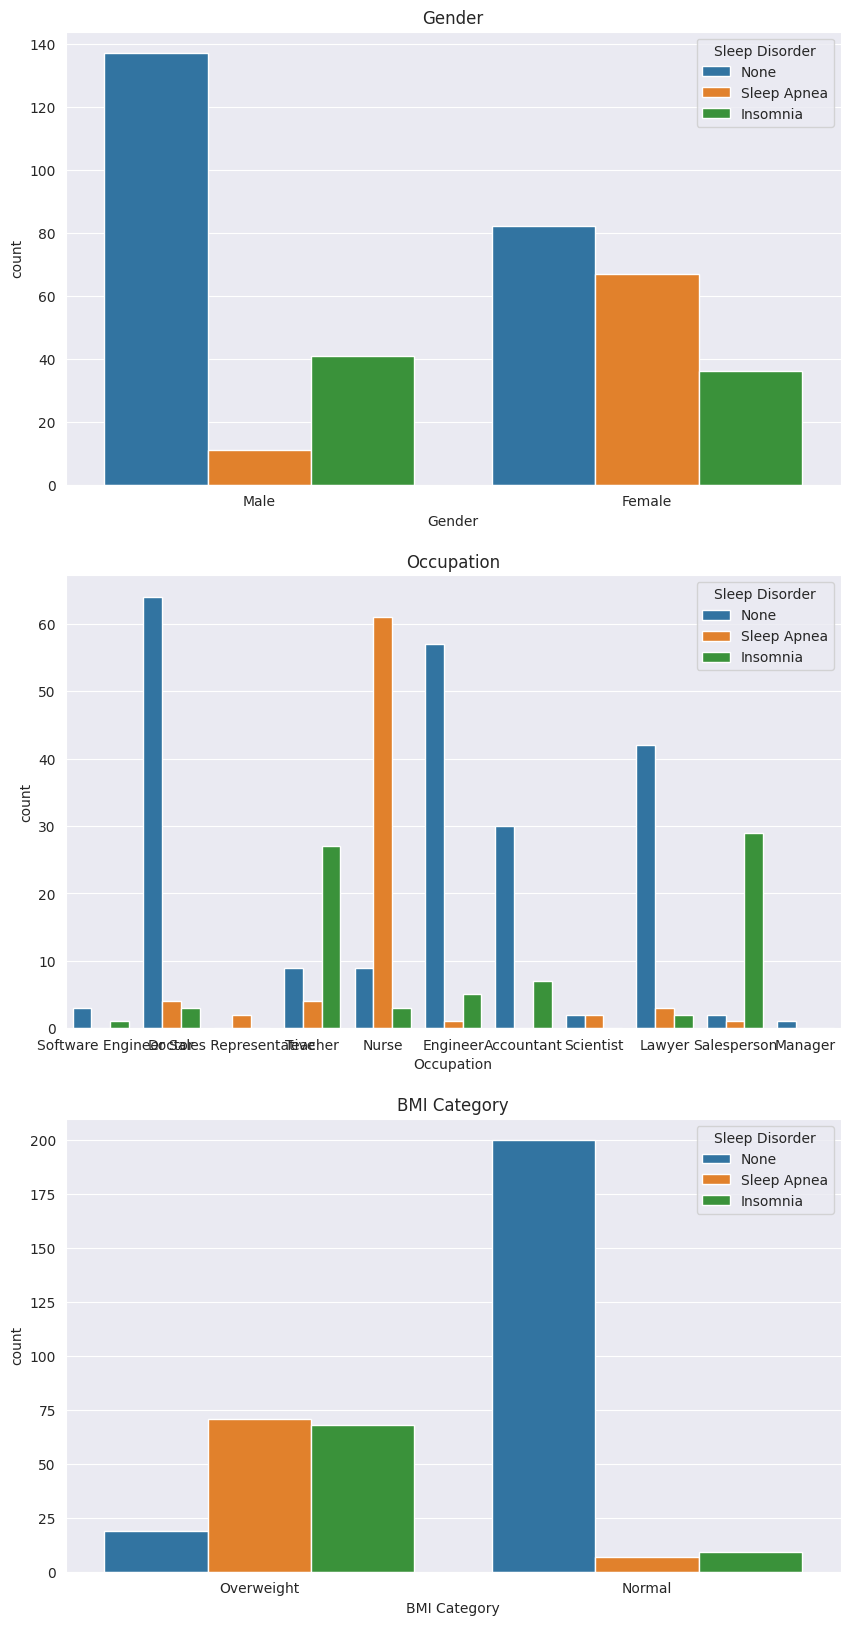

In [7]:
plt.figure(figsize=(10, 20))
object_cols_no_disorder = object_cols.drop(['Sleep Disorder'])
df['BMI Category'].replace({'Normal Weight': 'Normal', 'Obese': 'Overweight'}, inplace=True)
for i, col in enumerate(object_cols_no_disorder):
    plt.subplot(3, 1, i+1)
    plt.gca().set_title(col)
    sns.countplot(x=col, hue='Sleep Disorder', data=df)

### Encoding categorical values

In [8]:
df[['Systolic Pressure', 'Diastolic Pressure']] =\
    df['Blood Pressure'].apply(lambda x: pd.Series(x.split('/')).astype(int))
OH_encoding = pd.get_dummies(df[['Gender', 'Occupation', 'BMI Category']], dtype=float)
df_encoded = pd.concat([df, OH_encoding], axis = 1)
df_encoded.drop(['Gender', 'Occupation', 'BMI Category', 'Blood Pressure'], axis = 1, inplace=True)
df_encoded.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Overweight
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,...,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733,...,0.125668,0.002674,0.195187,0.005348,0.085561,0.010695,0.010695,0.106952,0.577540,0.422460
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611,...,0.331919,0.051709,0.396876,0.073029,0.280090,0.103001,0.103001,0.309466,0.494613,0.494613
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting data to test and train. Removing 'Quality of Sleep', 'Daily Steps', because they are high correlated with another features

In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Sleep Disorder', 'Quality of Sleep', 'Daily Steps', 'Person ID'], axis=1)
y = df_encoded['Sleep Disorder']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Find best parameters for Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
parameters = {'max_iter': [100, 5000, 10000],
              'penalty': ['l1', 'l2', 'elasticnet', None],
              'solver': ['saga']}

model = LogisticRegression()
gridLogisticRegression = GridSearchCV(model, parameters)
gridLogisticRegression.fit(X_train, y_train)

print('Best params: ', gridLogisticRegression.best_params_)
print('Best score: ', gridLogisticRegression.best_score_)

/home/leonid/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leonid/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leonid/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leonid/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leonid/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/leonid/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:35

Best params:  {'max_iter': 5000, 'penalty': 'l1', 'solver': 'saga'}
Best score:  0.8796610169491526


### Training Logistic Regression model

Text(50.722222222222214, 0.5, 'groud_truth')

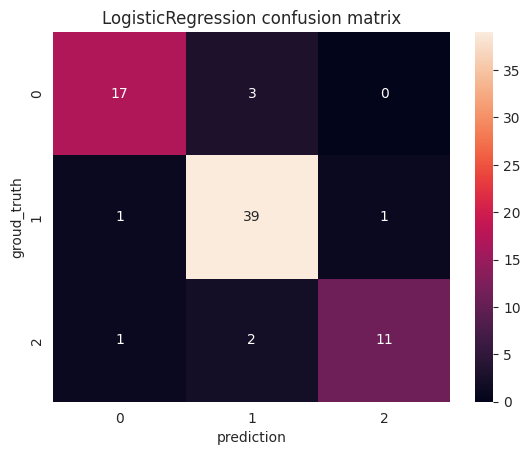

In [11]:
lg = LogisticRegression(max_iter=5000, penalty='l1', solver='liblinear', random_state=1)
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)

cm = confusion_matrix(y_test, lg_pred)
sns.heatmap(cm, annot=True)

plt.title('LogisticRegression confusion matrix')
plt.xlabel('prediction')
plt.ylabel('groud_truth')

### Accuracy is 0.89

In [12]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

    Insomnia       0.89      0.85      0.87        20
        None       0.89      0.95      0.92        41
 Sleep Apnea       0.92      0.79      0.85        14

    accuracy                           0.89        75
   macro avg       0.90      0.86      0.88        75
weighted avg       0.89      0.89      0.89        75



### Feature weights

In [13]:
feature_imp = pd.DataFrame(lg.coef_.T, index = X.columns)
feature_imp

,0,1,2
Age,0.024558,-0.032625,0.027349
Sleep Duration,-1.437811,1.109208,0.000000
Physical Activity Level,-0.018439,-0.003291,0.003753
Stress Level,-0.117526,0.040045,-0.044318
Heart Rate,-0.081134,-0.020433,0.181973
Systolic Pressure,0.112704,0.113979,-0.447350
Diastolic Pressure,0.000985,-0.241050,0.499224
Gender_Female,0.000000,0.000000,0.000000
Gender_Male,0.000000,0.000000,0.000000
Occupation_Accountant,1.474185,0.000000,-0.965446


In [14]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

steps = [('scale', StandardScaler()),
         ('sequential_selector', SequentialFeatureSelector(lg, direction='backward')),
         ('model', LogisticRegression(max_iter=5000, solver='liblinear', random_state=1))]

Text(50.722222222222214, 0.5, 'groud_truth')

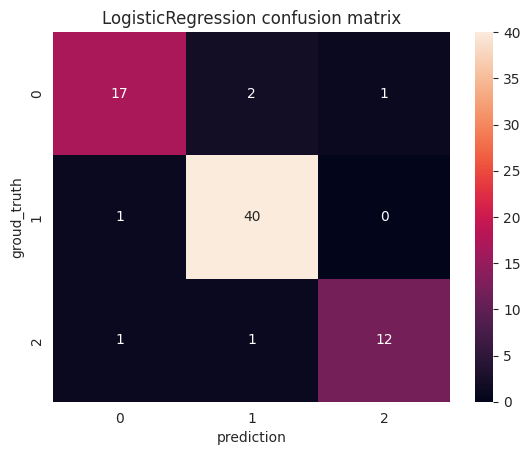

In [15]:
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
lg_pred = pipeline.predict(X_test)

cm = confusion_matrix(y_test, lg_pred)
sns.heatmap(cm, annot=True)

plt.title('LogisticRegression confusion matrix')
plt.xlabel('prediction')
plt.ylabel('groud_truth')

In [16]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

    Insomnia       0.89      0.85      0.87        20
        None       0.93      0.98      0.95        41
 Sleep Apnea       0.92      0.86      0.89        14

    accuracy                           0.92        75
   macro avg       0.92      0.89      0.90        75
weighted avg       0.92      0.92      0.92        75



### Accuracy is 0.92

In [17]:
final_feature_imp = pd.DataFrame(pipeline.named_steps['model'].coef_.T)
final_feature_imp

,0,1,2
0,-1.210634,0.556625,0.642613
1,-0.833166,0.566465,-0.007857
2,-0.510749,0.285761,0.333663
3,0.169691,-0.648935,0.654047
4,2.280949,-2.684232,1.203245
5,0.875760,-0.736610,-0.202771
6,0.556966,-0.199161,-0.291915
7,-1.372418,0.107252,0.865727
8,-0.496322,-0.114761,0.368480
9,1.040897,-0.820764,-0.487192


In [18]:
logistic_features = pd.DataFrame({'ss': pipeline.named_steps['sequential_selector'].get_support(), 'col_name': X_train.columns})
logistic_features = logistic_features.loc[logistic_features.ss!=False]
logistic_features_names = logistic_features.col_name

Text(50.722222222222214, 0.5, 'groud_truth')

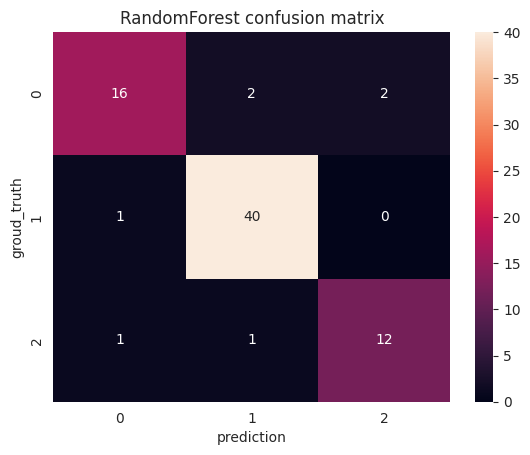

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators= 500,
              max_features= 1,
              random_state= 1,
              n_jobs= -1)

steps = [('scale', StandardScaler()),
         ('sequential_selector', SequentialFeatureSelector(lg, direction='forward', n_jobs=-1)),
         ('model', rf_model)]

pipeline_rf = Pipeline(steps)
pipeline_rf.fit(X_train, y_train)

rf_pred = pipeline_rf.predict(X_test)

cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True)

plt.title('RandomForest confusion matrix')
plt.xlabel('prediction')
plt.ylabel('groud_truth')

In [20]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

    Insomnia       0.89      0.80      0.84        20
        None       0.93      0.98      0.95        41
 Sleep Apnea       0.86      0.86      0.86        14

    accuracy                           0.91        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.91      0.91      0.91        75



### Random Forest have a 0.91 accuracy